In [1]:
from useful_functions import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmed.baameur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmed.baameur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = df_from_json("comment_code_data2.json")

clean_comments(df)

,body,comment,clean
0,protected boolean acquireLock(final TEnviron...,/**\n * The user should override this method...,\n the user should override this method ...
1,protected void releaseLock(final TEnvironmen...,/**\n * The user should override this method...,\n the user should override this method ...
2,protected void beforeReplay(final TEnvironme...,/**\n * Called when the procedure is loaded ...,\n called when the procedure is loaded fo...
3,protected void completionCleanup(final TEnvi...,/**\n * Called when the procedure is marked ...,\n called when the procedure is marked as...
4,protected boolean isYieldAfterExecutionStep(...,"/**\n * By default, the executor will try ro...",\n by default the executor will try ro r...
...,...,...,...
2936480,public void delete(Long id) {\n log...,/**\n * Delete the job by id.\n *\n ...,\n delete the job by id \n \n ...
2936481,public Proposal save(Proposal proposal) {\...,/**\n * Save a proposal.\n *\n * @...,\n save a proposal \n \n @pa...
2936482,public void delete(Long id) {\n log...,/**\n * Delete the proposal by id.\n ...,\n delete the proposal by id \n ...
2936483,public Skill save(Skill skill) {\n ...,/**\n * Save a skill.\n *\n * @par...,\n save a skill \n \n @param...


In [3]:
#General list of javadocs content
at = ["@param", "@return", "@code", "@link", "@see", "@throw", "@exception"]
keywords(df,at)

,body,comment,clean,keywords
0,protected boolean acquireLock(final TEnviron...,/**\n * The user should override this method...,\n the user should override this method ...,@return
1,protected void releaseLock(final TEnvironmen...,/**\n * The user should override this method...,\n the user should override this method ...,
2,protected void beforeReplay(final TEnvironme...,/**\n * Called when the procedure is loaded ...,\n called when the procedure is loaded fo...,
3,protected void completionCleanup(final TEnvi...,/**\n * Called when the procedure is marked ...,\n called when the procedure is marked as...,
4,protected boolean isYieldAfterExecutionStep(...,"/**\n * By default, the executor will try ro...",\n by default the executor will try ro r...,@param @return
...,...,...,...,...
2936480,public void delete(Long id) {\n log...,/**\n * Delete the job by id.\n *\n ...,\n delete the job by id \n \n ...,@param
2936481,public Proposal save(Proposal proposal) {\...,/**\n * Save a proposal.\n *\n * @...,\n save a proposal \n \n @pa...,@param @return
2936482,public void delete(Long id) {\n log...,/**\n * Delete the proposal by id.\n ...,\n delete the proposal by id \n ...,@param
2936483,public Skill save(Skill skill) {\n ...,/**\n * Save a skill.\n *\n * @par...,\n save a skill \n \n @param...,@param @return


In [4]:
count_at_words = Counter(" ".join(df.keywords).split()).most_common(7)
print(count_at_words)

[('@param', 1872666), ('@return', 982198), ('@code', 521168), ('@link', 395101), ('@see', 334294), ('@exception', 118681), ('@throw', 325)]


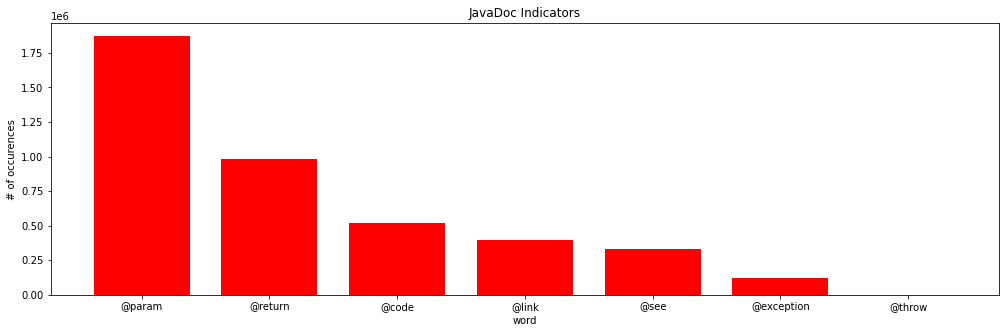

In [5]:
frequency_plot(count_at_words, "JavaDoc Indicators")

In [6]:
print(f"{len(df)-(df.keywords == '').sum()} comment/code pairs contain specified keywords.")

1823883 comment/code pairs contain specified keywords.


In [7]:
def percentage(part, whole):
  return 100 * float(part)/float(whole)

for x,y in count_at_words:
    print(f"{x} appears in {percentage(y,len(df)):.4}% of the comment/code pairs.")

@param appears in 63.77% of the comment/code pairs.
@return appears in 33.45% of the comment/code pairs.
@code appears in 17.75% of the comment/code pairs.
@link appears in 13.45% of the comment/code pairs.
@see appears in 11.38% of the comment/code pairs.
@exception appears in 4.042% of the comment/code pairs.
@throw appears in 0.01107% of the comment/code pairs.


In [8]:
"""Drop Comment/Code Pairs Without Specified Keywords"""
df.keywords.replace('', np.nan, inplace=True)
df.dropna(subset=['keywords'], inplace=True)
print(len(df))

1823883
